In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.9.1


In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

68606236/68606236 [==============================] - 3s 0us/step
C:\Users\posky\.keras\datasets\cats_and_dogs.zip
C:\Users\posky\.keras\datasets\cats_and_dogs_filtered


In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(train_dir)
print(validation_dir)

C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\validation


In [5]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

print('dogs: ', train_dogs_dir)
print('cats: ', train_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

print('dogs: ', validation_dogs_dir)
print('cats: ', validation_cats_dir)

dogs:  C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\train\dogs
cats:  C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\train\cats
dogs:  C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\validation\dogs
cats:  C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\validation\cats


In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('Total training cat images: ', num_cats_tr)
print('Total training dog images: ', num_dogs_tr)
print('--')

print('Total validation cat images: ', num_cats_val)
print('Total validation dog images: ', num_dogs_val)
print('--')

print('Total training images: ', total_train)
print('Total validation iamges: ', total_val)

Total training cat images:  1000
Total training dog images:  1000
--
Total validation cat images:  500
Total validation dog images:  500
--
Total training images:  2000
Total validation iamges:  1000


In [8]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
SEED = 100

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [12]:
print(train_dir)

C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\train


In [13]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    seed=SEED
)

Found 2000 images belonging to 2 classes.


In [14]:
print(validation_dir)

C:\Users\posky\.keras\datasets\cats_and_dogs_filtered\validation


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    seed=SEED
)

Found 1000 images belonging to 2 classes.


In [16]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

In [17]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

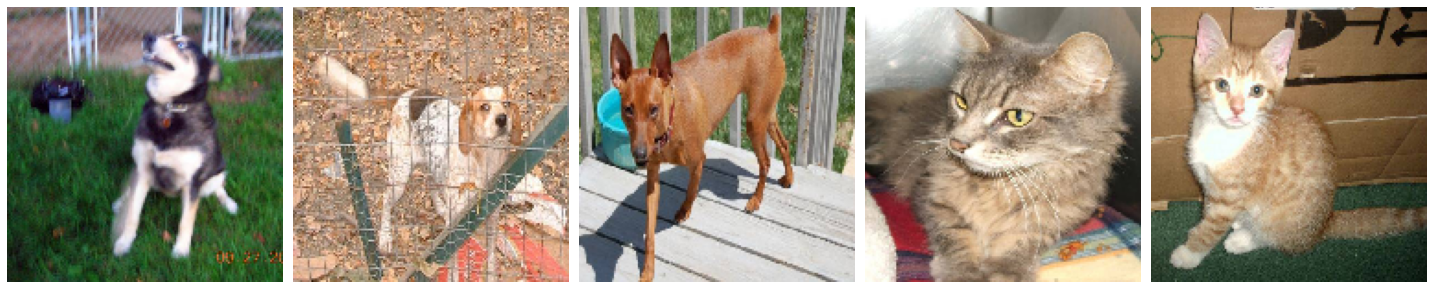

In [18]:
plotimages(sample_training_images[:5])

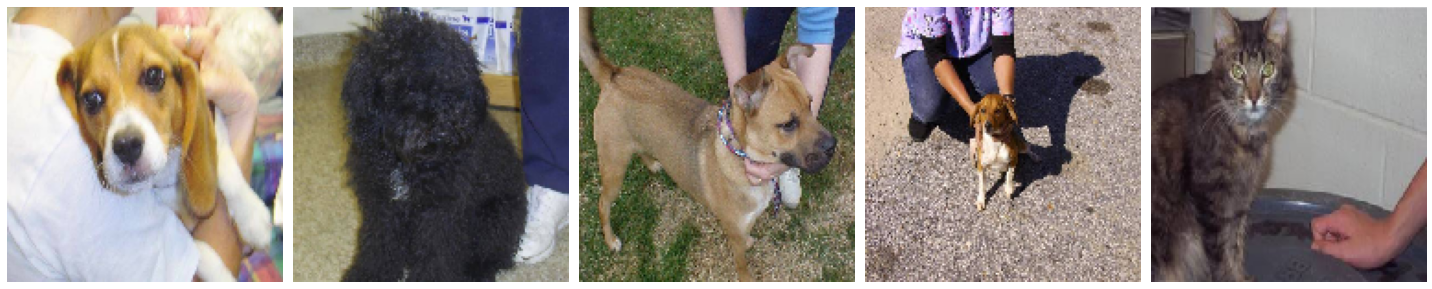

In [19]:
sample_training_images, _ = next(train_data_gen)
plotimages(sample_training_images[:5])

In [22]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
%%time

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15


<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


15/15 [==============================] - 13s 822ms/step - loss: 0.9379 - accuracy: 0.5107 - val_loss: 0.6921 - val_accuracy: 0.5257
Epoch 2/15
15/15 [==============================] - 6s 371ms/step - loss: 0.6867 - accuracy: 0.5390 - val_loss: 0.6745 - val_accuracy: 0.6272
Epoch 3/15
15/15 [==============================] - 6s 374ms/step - loss: 0.6577 - accuracy: 0.6293 - val_loss: 0.6499 - val_accuracy: 0.6384
Epoch 4/15
15/15 [==============================] - 6s 378ms/step - loss: 0.6119 - accuracy: 0.6822 - val_loss: 0.6134 - val_accuracy: 0.6730
Epoch 5/15
15/15 [==============================] - 6s 372ms/step - loss: 0.5480 - accuracy: 0.7308 - val_loss: 0.6214 - val_accuracy: 0.6540
Epoch 6/15
15/15 [==============================] - 6s 377ms/step - loss: 0.5026 - accuracy: 0.7591 - val_loss: 0.5308 - val_accuracy: 0.7321
Epoch 7/15
15/15 [==============================] - 6s 379ms/step - loss: 0.4158 - accuracy: 0.8168 - val_loss: 0.5988 - val_accuracy: 0.7031
Epoch 8/15
15/15